In [1]:
from jbfg.pandas_utils import *
# schema = 'l2_kjbk_extnl'
# sql = 'select * from bank_churner'
# bank_churner = get_df(sql,schema)
bank_churner = pd.read_csv("../0.data/bank_churner.csv")
data = bank_churner
data

,Unnamed: 0,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,NaN,1883.0,0.831,NaN,111.0,0.734,0.469
1,1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,NaN
2,2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771.0,6487.0,NaN,1447.0,23.0,0.000,0.214
3,3,708085458,0,34,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.000
4,4,708086958,0,49,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749.0,2379.0,0.598,NaN,NaN,NaN,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,8096,828285858,0,41,F,3,College,Married,NaN,Blue,...,1,2,1438.3,765.0,673.3,NaN,NaN,NaN,NaN,0.532
8097,8097,828288333,0,50,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659.0,2981.0,NaN,NaN,NaN,0.842,0.181
8098,8098,828294933,1,49,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437.0,514.0,NaN,NaN,NaN,0.565,NaN
8099,8099,828298908,0,54,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035.0,837.0,0.613,1770.0,NaN,0.741,0.709


In [2]:
## 빈값'' 은 NaN 으로 변경
data = data.replace('',np.NaN)
##Dtype 가 모두 object 여서 해당 값에 맞게 타입변경
data = data.astype({'cstno':'int64'})    
data = data.astype({'is_churned':'int64'})
data = data.astype({'age':'int64'})
data = data.astype({'dependent_num':'int64'})
data = data.astype({'mon_on_book':'int64'})
data = data.astype({'tot_product_count':'int64'})
data = data.astype({'months_inact_for_12m':'int64'})
data = data.astype({'contact_cnt_for_12m':'int64'})
data = data.astype({'credit_line':'float64'})
data = data.astype({'tot_revol_balance':'float64'})
data = data.astype({'mean_open_to_buy':'float64'})
data = data.astype({'tot_amt_ratio_q4_q1':'float64'})
data = data.astype({'tot_trans_amt_for_12m':'float64'})
data = data.astype({'tot_trans_cnt_for_12m':'float64'})
data = data.astype({'tot_cnt_ratio_q4_q1':'float64'})
data = data.astype({'mean_util_pct':'float64'})

In [3]:
"""
cstno	고객번호
is_churned	1: 이탈 0: 유지
age	나이
sex	성별
dependent_num	부양가족수
education	교육수준
marital_stat	결혼상태
imcome_cat	수입규모
card_type	카드 종류
mon_on_book	은행 거래 기간
tot_product_count	현재 보유 상품 개수
months_inact_for_12m	최근 12개월 동안 카드 거래가 없었던 개월 수
contact_cnt_for_12m	최근 12개월 동안 연락 횟수
credit_line	카드 한도
tot_revol_balance	리볼빙 잔액
mean_open_to_buy	평균 사용가능 신용한도
tot_amt_ratio_q4_q1	1분기 대비 4분기의 거래 금액 비율
tot_trans_amt_for_12m	최근 12개월 동안의 거래 금액
tot_trans_cnt_for_12m	최근 12개월 동안의 거래 횟수
tot_cnt_ratio_q4_q1	1분기 대비 4분기의 거래 횟수 비율
mean_util_pct	평균 한도 소진율

"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8101 non-null   int64  
 1   cstno                  8101 non-null   int64  
 2   is_churned             8101 non-null   int64  
 3   age                    8101 non-null   int64  
 4   sex                    7293 non-null   object 
 5   dependent_num          8101 non-null   int64  
 6   education              8101 non-null   object 
 7   marital_stat           8101 non-null   object 
 8   imcome_cat             6482 non-null   object 
 9   card_type              8101 non-null   object 
 10  mon_on_book            8101 non-null   int64  
 11  tot_product_count      8101 non-null   int64  
 12  months_inact_for_12m   8101 non-null   int64  
 13  contact_cnt_for_12m    8101 non-null   int64  
 14  credit_line            8101 non-null   float64
 15  tot_

In [4]:
##필요패키지 IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

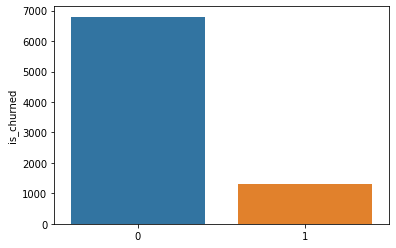

In [5]:
##데이터중 이탈고객 비율 확인
x = data['is_churned'].value_counts().index
y = data['is_churned'].value_counts()
sns.barplot(x=x,y=y)

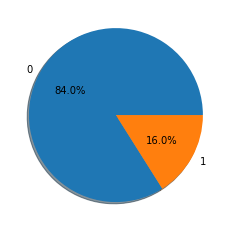

In [6]:
#부채꼴 표기
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

In [7]:
##남녀비율 결측치 처리 -> Unkown으로처리
data['sex'].fillna('Unkown',inplace=True)

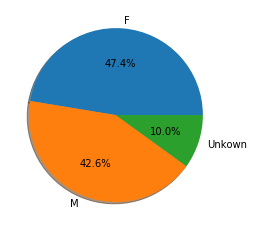

In [8]:
#전체 남녀비율
x = data['sex'].value_counts().index
y = data['sex'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

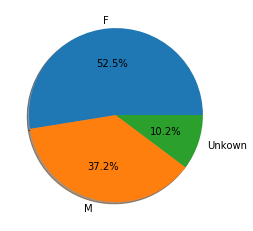

In [9]:
#이탈고객내 남녀비율
data_churned = data[data['is_churned'] == 1]
x = data_churned['sex'].value_counts().index
y = data_churned['sex'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

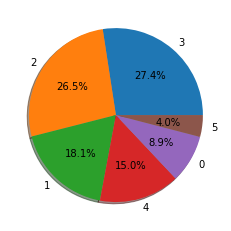

In [10]:
#전체 부양가족수 비율(결측치 없음)
x = data['dependent_num'].value_counts().index
y = data['dependent_num'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

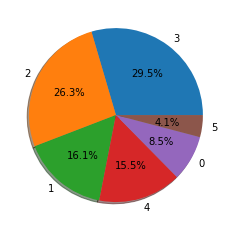

In [11]:
#이탈고객내 부양가족수 비율
data_churned = data[data['is_churned'] == 1]
x = data_churned['dependent_num'].value_counts().index
y = data_churned['dependent_num'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

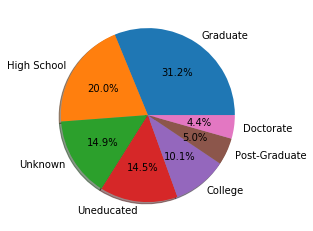

In [12]:
## education 교육수준 분석 (결측치 없음)
x = data['education'].value_counts().index
y = data['education'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

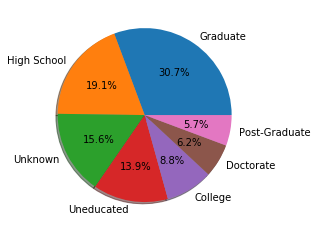

In [13]:
x = data_churned['education'].value_counts().index
y = data_churned['education'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

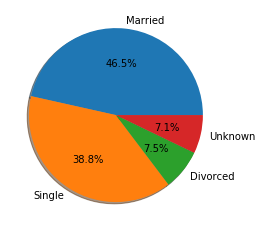

In [14]:
## marital_stat 결혼유부(결측치없음) 분석
x = data['marital_stat'].value_counts().index
y = data['marital_stat'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

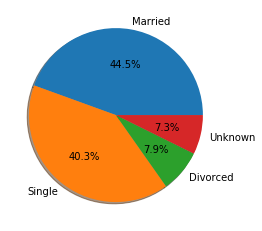

In [15]:
x = data_churned['marital_stat'].value_counts().index
y = data_churned['marital_stat'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

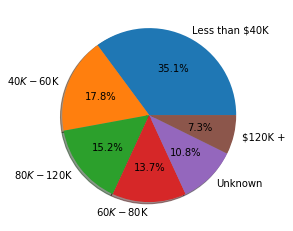

In [16]:
### 수입규모 분석 ( 결측치 있음! )
x = data['imcome_cat'].value_counts().index
y = data['imcome_cat'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()

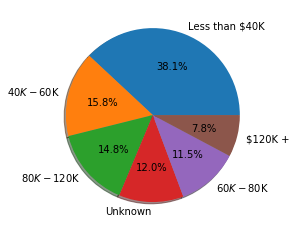

In [17]:
x = data_churned['imcome_cat'].value_counts().index
y = data_churned['imcome_cat'].value_counts()
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True)
plt.show()
## 수입이 많을수록 고객이탈을 더 하거나 줄지 않는다. 그러므로, 구분값으로 활용해야한다.별도 숫자료 변경하지 않고 그대로 이용!

In [18]:
## imcome_cat 수입규모 결측치 처리 1619 -> Unknown 으로 처리한다.(기존Unknown과 합체)
data['imcome_cat'].value_counts()
len(data[data['imcome_cat'].isna()])
data['imcome_cat'].fillna('Unknown',inplace=True)
data['imcome_cat'].value_counts()
## 결측 데이터에도 반영
data_churned = data[data['is_churned'] == 1]

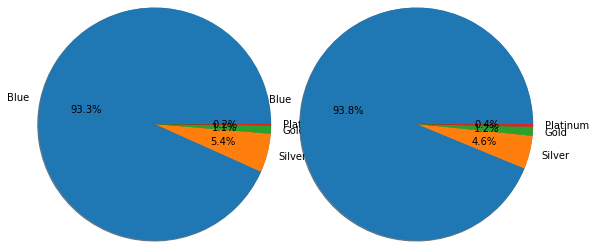

In [19]:
## card_type 카트타입 (결측치 없음)
x = data['card_type'].value_counts().index
y = data['card_type'].value_counts()
plt.subplot(1,4,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=4)

x = data_churned['card_type'].value_counts().index
y = data_churned['card_type'].value_counts()
plt.subplot(1,4,4)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=4)
plt.show()

In [20]:
## mon_on_book 은행 거래 기간 (결측치 없음)
## 은행거래 기간이 길수록 고객탈회 확률이 줄어드는지를 확인하기 위해 전체 평균, 탈회 평균 , 유지 평균을 본다
total_mon_mean = data['mon_on_book'].mean()
churned_mon_mean = data_churned['mon_on_book'].mean()
data_not_churned= data[data['is_churned'] == 0]
not_churned_mon_mean = data_not_churned['mon_on_book'].mean()
print(f'{total_mon_mean:.2f} {not_churned_mon_mean:.2f} {churned_mon_mean:.2f}')
## 탈회고객의 가입기간 평균이 좀더 크다!!

35.92 35.85 36.33


In [21]:
## tot_product_count 현재 보유 상품 개수 (결측치 없음)
## 보유 상품 개수가 많으면 탈회를 덜할것 같다~~!
total_mon_mean = data['tot_product_count'].mean()
churned_mon_mean = data_churned['tot_product_count'].mean()
not_churned_mon_mean = data_not_churned['tot_product_count'].mean()
print(f'{total_mon_mean:.2f} {not_churned_mon_mean:.2f} {churned_mon_mean:.2f}')
## 탈회고객의 가입기간 평균이 좀더 크다!!

3.81 3.92 3.28


In [22]:
data_not_churned.describe()

,Unnamed: 0,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,6801.000000,6.801000e+03,6801.0,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,5535.000000,6801.000000,4729.000000,5399.000000,4051.000000,5448.000000,4672.00000
mean,4111.964270,7.398937e+08,0.0,46.182914,2.323188,35.845464,3.915601,2.277459,2.348625,8733.619453,1250.409395,7479.352433,0.773682,4715.433784,68.684769,0.738412,0.29482
std,2328.935225,3.713032e+07,0.0,8.092012,1.291922,8.056077,1.528338,1.016875,1.075695,9064.765487,757.272964,9060.848860,0.215686,3571.490268,22.935080,0.222931,0.27236
min,0.000000,7.080821e+08,0.0,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,837.000000,11.000000,0.028000,0.00000
25%,2109.000000,7.132560e+08,0.0,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2601.000000,798.500000,1193.000000,0.644000,2430.000000,54.000000,0.615000,0.05500
50%,4130.000000,7.180881e+08,0.0,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4666.000000,1360.000000,3519.000000,0.744000,4119.000000,71.000000,0.719000,0.20800
75%,6136.000000,7.782864e+08,0.0,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11338.000000,1794.000000,10054.000000,0.861000,4801.500000,82.000000,0.833000,0.52900
max,8100.000000,8.283431e+08,0.0,70.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,2.594000,18484.000000,139.000000,3.571000,0.99400


In [23]:
data_churned.describe()

,Unnamed: 0,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,1300.000000,1.300000e+03,1300.0,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1045.000000,1300.000000,937.000000,1033.000000,800.000000,1024.000000,903.000000
mean,3725.831538,7.351529e+08,1.0,46.952308,2.395385,36.332308,3.277692,2.710000,2.982308,8128.715385,672.905263,7459.491538,0.699757,2992.876089,43.723750,0.558533,0.166621
std,2363.704747,3.554315e+07,0.0,7.619161,1.275931,7.846705,1.564314,0.918407,1.076945,9185.677640,928.222599,9184.764378,0.217125,2245.287763,14.509673,0.236452,0.268772
min,1.000000,7.080833e+08,1.0,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,11.000000,0.000000,0.000000
25%,1646.500000,7.121885e+08,1.0,42.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2091.250000,0.000000,1589.750000,0.551000,1874.000000,36.000000,0.400000,0.000000
50%,3558.000000,7.166047e+08,1.0,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4074.000000,0.000000,3425.000000,0.705000,2310.000000,43.000000,0.531000,0.000000
75%,5703.500000,7.678791e+08,1.0,52.000000,3.000000,41.000000,5.000000,3.000000,4.000000,9765.250000,1273.000000,9108.750000,0.864000,2729.000000,50.000000,0.700000,0.252000
max,8098.000000,8.282949e+08,1.0,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.411000,10468.000000,91.000000,2.500000,0.999000


In [24]:
## 결측치들이 차지하는 비율 -> 결측치 모두 처리하고 재확인!
data.isna().mean()

Unnamed: 0               0.000000
cstno                    0.000000
is_churned               0.000000
age                      0.000000
sex                      0.000000
dependent_num            0.000000
education                0.000000
marital_stat             0.000000
imcome_cat               0.000000
card_type                0.000000
mon_on_book              0.000000
tot_product_count        0.000000
months_inact_for_12m     0.000000
contact_cnt_for_12m      0.000000
credit_line              0.000000
tot_revol_balance        0.187755
mean_open_to_buy         0.000000
tot_amt_ratio_q4_q1      0.300580
tot_trans_amt_for_12m    0.206024
tot_trans_cnt_for_12m    0.401185
tot_cnt_ratio_q4_q1      0.201086
mean_util_pct            0.311813
dtype: float64

In [25]:
## tot_revol_balance 리볼빙 잔액 (결측치 있음)
## 위 숫자 비교에서 확인했을때, 탈회고객들은 50% 이하는 모두 0으로설정
## tot_revol_balance 리볼빙 잔액 결측치 처리 -> 유지고객: 평균이 크다, 탈회고객 편차가 크다. 둘의 영향을 주지 않기 위해 0으로 채움
data['tot_revol_balance'].fillna(0.0,inplace=True)

In [26]:
## tot_amt_ratio_q4_q1 1분기 대비 4분기의 거래 금액 비율 (결측치 있음)
## 탈회고객은 사용량이 유지고객에 비교하여 줄어들게 됨
## 탈회/유지 각각의 평균값으로 채운다
not_churned_mean = round(data_not_churned['tot_amt_ratio_q4_q1'].mean(),3)
chuned_mean = round(data_churned['tot_amt_ratio_q4_q1'].mean(),3)
new_tot_amt_ratio_q4_q1 = []
for idx, row in data[['tot_amt_ratio_q4_q1','is_churned']].iterrows():
    if(np.isnan(row['tot_amt_ratio_q4_q1'])):
        if(row['is_churned'] == 1):
            new_tot_amt_ratio_q4_q1.append(chuned_mean)
        else:
            new_tot_amt_ratio_q4_q1.append(not_churned_mean)
    else:
        new_tot_amt_ratio_q4_q1.append(row['tot_amt_ratio_q4_q1'])
new_tot_amt_ratio_q4_q1 = pd.Series(new_tot_amt_ratio_q4_q1)
data['tot_amt_ratio_q4_q1'] = new_tot_amt_ratio_q4_q1

In [27]:
## tot_trans_amt_for_12m 최근 12개월 동안의 거래 금액 (결측치 있음)
## 탈회/유지 각각의 평균값으로 채운다
not_churned_mean = round(data_not_churned['tot_trans_amt_for_12m'].mean(),3)
chuned_mean = round(data_churned['tot_trans_amt_for_12m'].mean(),3)
new_tot_trans_amt_for_12m = []
for idx, row in data[['tot_trans_amt_for_12m','is_churned']].iterrows():
    if(np.isnan(row['tot_trans_amt_for_12m'])):
        if(row['is_churned'] == 1):
            new_tot_trans_amt_for_12m.append(chuned_mean)
        else:
            new_tot_trans_amt_for_12m.append(not_churned_mean)
    else:
        new_tot_trans_amt_for_12m.append(row['tot_trans_amt_for_12m'])
new_tot_trans_amt_for_12m = pd.Series(new_tot_trans_amt_for_12m)
data['tot_trans_amt_for_12m'] = new_tot_trans_amt_for_12m

In [28]:
## tot_trans_cnt_for_12m 최근 12개월 동안의 거래 횟수 (결측치 있음)
## 탈회/유지 각각의 평균값으로 채운다
not_churned_mean = round(data_not_churned['tot_trans_cnt_for_12m'].mean(),3)
chuned_mean = round(data_churned['tot_trans_cnt_for_12m'].mean(),3)
new_tot_trans_cnt_for_12m = []
for idx, row in data[['tot_trans_cnt_for_12m','is_churned']].iterrows():
    if(np.isnan(row['tot_trans_cnt_for_12m'])):
        if(row['is_churned'] == 1):
            new_tot_trans_cnt_for_12m.append(chuned_mean)
        else:
            new_tot_trans_cnt_for_12m.append(not_churned_mean)
    else:
        new_tot_trans_cnt_for_12m.append(row['tot_trans_cnt_for_12m'])
new_tot_trans_cnt_for_12m = pd.Series(new_tot_trans_cnt_for_12m)
data['tot_trans_cnt_for_12m'] = new_tot_trans_cnt_for_12m

In [29]:
## tot_cnt_ratio_q4_q1 1분기 대비 4분기의 거래 횟수 비율 (결측치 있음)
## 탈회/유지 각각의 평균값으로 채운다
not_churned_mean = round(data_not_churned['tot_cnt_ratio_q4_q1'].mean(),3)
chuned_mean = round(data_churned['tot_cnt_ratio_q4_q1'].mean(),3)
new_tot_cnt_ratio_q4_q1 = []
for idx, row in data[['tot_cnt_ratio_q4_q1','is_churned']].iterrows():
    if(np.isnan(row['tot_cnt_ratio_q4_q1'])):
        if(row['is_churned'] == 1):
            new_tot_cnt_ratio_q4_q1.append(chuned_mean)
        else:
            new_tot_cnt_ratio_q4_q1.append(not_churned_mean)
    else:
        new_tot_cnt_ratio_q4_q1.append(row['tot_cnt_ratio_q4_q1'])
new_tot_cnt_ratio_q4_q1 = pd.Series(new_tot_cnt_ratio_q4_q1)
data['tot_cnt_ratio_q4_q1'] = new_tot_cnt_ratio_q4_q1

In [30]:
## mean_util_pct 평균 한도 소진율 (결측치 있음)
## 탈회/유지 각각의 평균값으로 채운다
not_churned_mean = round(data_not_churned['mean_util_pct'].mean(),3)
chuned_mean = round(data_churned['mean_util_pct'].mean(),3)
new_mean_util_pct = []
for idx, row in data[['mean_util_pct','is_churned']].iterrows():
    if(np.isnan(row['mean_util_pct'])):
        if(row['is_churned'] == 1):
            new_mean_util_pct.append(chuned_mean)
        else:
            new_mean_util_pct.append(not_churned_mean)
    else:
        new_mean_util_pct.append(row['mean_util_pct'])
new_mean_util_pct = pd.Series(new_mean_util_pct)
data['mean_util_pct'] = new_mean_util_pct

In [31]:
## object 데이터들 더미처리
ready_data = pd.get_dummies(data, columns=['sex','education','marital_stat','imcome_cat','card_type'], drop_first= True)

In [32]:
## 테스트셋 구분 전체데이터 크기를 생각해서 20%만 테스트로 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ready_data.drop('is_churned', axis=1), ready_data['is_churned'], test_size=0.2, random_state=100)

In [33]:
## XGBoost 모델을 이용하여 훈련
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100)
model.fit(X_train, y_train)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=64,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,pred)

0.9907464528069093

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1392
           1       0.97      0.96      0.97       229

    accuracy                           0.99      1621
   macro avg       0.98      0.98      0.98      1621
weighted avg       0.99      0.99      0.99      1621



In [36]:
print(confusion_matrix(y_test,pred))

[[1386    6]
 [   9  220]]


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.9781941725643729

# 데이터 변환
> 다음 내용이 유일

In [ ]:
## object 데이터들 더미처리
ready_data = pd.get_dummies(data, columns=['sex','education','marital_stat','imcome_cat','card_type'], drop_first= True)